### Remove tellurics from a spectra

#### We want to use a small window so as not to cover the full range of an absorption or emission line but to catch the tellurics 


In [3]:
from astropy.stats import sigma_clip
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_spectrum(infile):
    data = fits.getdata(infile)
    wave = data[0]
    flux = data[1]
    return wave, flux

wave, flux = read_spectrum('/home/c4011027/PhD_stuff/ESO_proposals/manual_normalization/norm/ADP.2024-07-05T12:10:57.794_norm.fits')

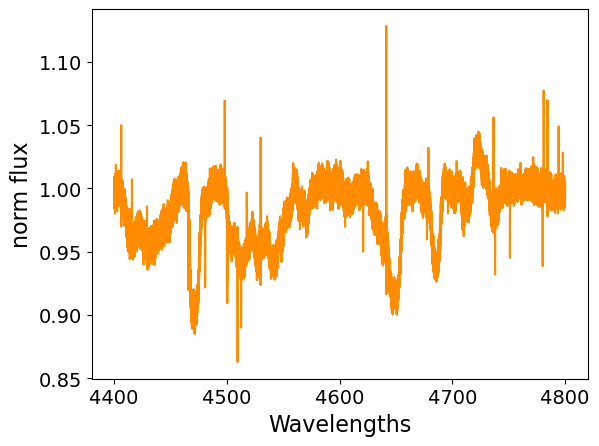

In [5]:
mask = np.where((wave>4400) & (wave<4800))
wv, flx = wave[mask], flux[mask]

plt.plot(wv, flx, color = 'darkorange')
plt.xlabel('Wavelengths', fontsize=16)
plt.ylabel('norm flux', fontsize=16)
plt.tick_params(axis='both', labelsize=14)

In [6]:
window_size = 50
cleaned_flx = np.copy(flx)

for i in range(0, len(wv), window_size):
    wv_window = wv[i:i + window_size]
    flx_window = flx[i:i + window_size]
    clipped_flux = sigma_clip(flx_window, sigma=3, maxiters=5, masked=True)
    cleaned_flx[i:i + window_size] = np.where(clipped_flux.mask, np.nan, flx_window)

cleaned_flx = np.interp(wv, wv[~np.isnan(cleaned_flx)], cleaned_flx[~np.isnan(cleaned_flx)])

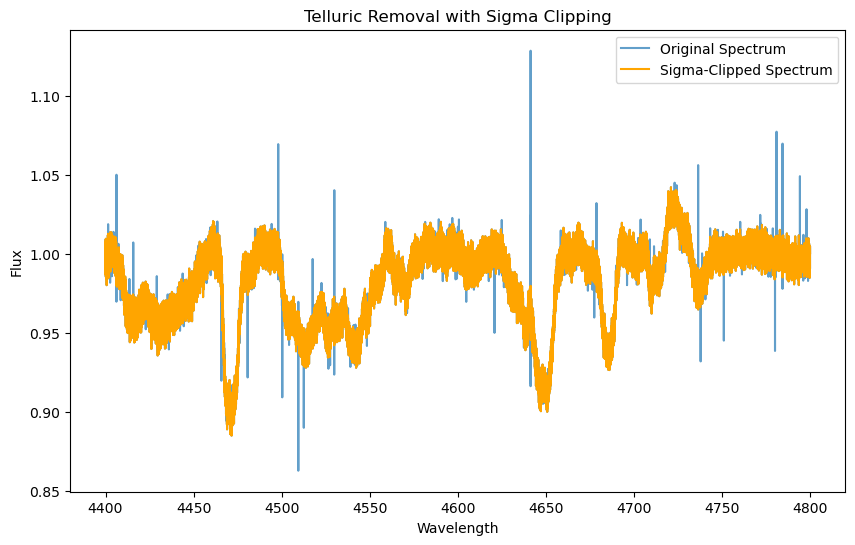

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(wv, flx, label="Original Spectrum", alpha=0.7)
plt.plot(wv, cleaned_flx, label="Sigma-Clipped Spectrum", color="orange")
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.legend()
plt.title("Telluric Removal with Sigma Clipping")
plt.show()

#### This seems to work. So we will do this for the whole spectra to see how that fares in other regions of the spectrum

In [57]:
def telluric_correction(wv, flx):
    window_size = 100
    cleaned_flx = np.copy(flx)

    for i in range(0, len(wv), window_size):
        flx_window = flx[i:i + window_size]
        clipped_flux = sigma_clip(flx_window, sigma=2, maxiters=10, masked=True)
        cleaned_flx[i:i + window_size] = np.where(clipped_flux.mask, np.nan, flx_window)

    cleaned_flx = np.interp(wv, wv[~np.isnan(cleaned_flx)], cleaned_flx[~np.isnan(cleaned_flx)])
    return wv, cleaned_flx

In [58]:
new_wave, new_flux = telluric_correction(wave, flux)

(3800.0, 4200.0)

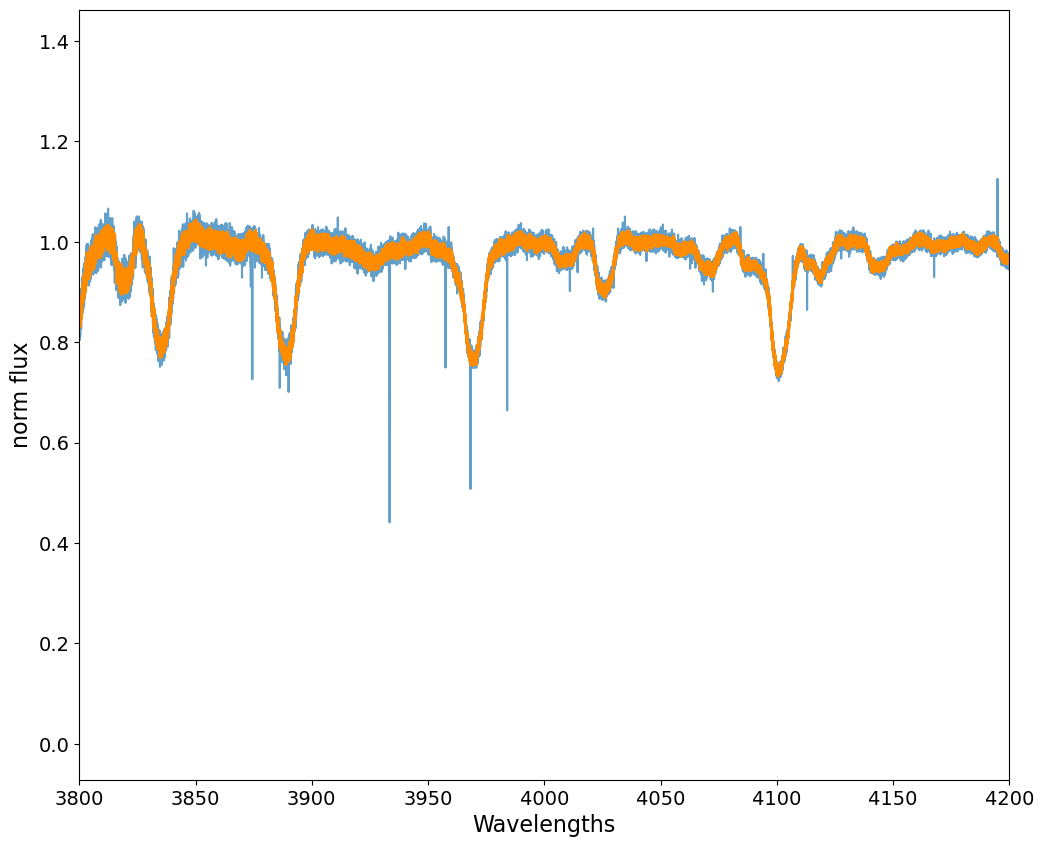

In [59]:
plt.figure(figsize=[12,10])
plt.plot(wave, flux, alpha=0.7)
plt.plot(new_wave, new_flux, color = 'darkorange')
plt.xlabel('Wavelengths', fontsize=16)
plt.ylabel('norm flux', fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.xlim(3800, 4200)

In [20]:
max(np.diff(wave))

0.013171720178434043